In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [32]:
# Import data from github

url = "https://raw.githubusercontent.com/rpulipaka-22/Adult-Income-K-Nearest-Neighbors-ML/main/Adult_Income.csv"
df = pd.read_csv(url)

df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [33]:
# Replace all "?" with Nan

data = df.copy()
data.replace("?", np.nan, inplace=True)

data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [34]:
# Determine if there are any missing values each column of the dataset contains

data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [35]:
# Find which columns contain missing values

null_cols = data.columns[data.isna().any()].tolist()

null_cols

['workclass', 'occupation', 'native-country']

In [36]:
# Replace all missing values with the mode of the column

for col in null_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [37]:
# We see that there are no more missing values
# Preprocessing and encoding categorical column

le = LabelEncoder()
category_cols = data.select_dtypes(include=["object"]).columns

# All category values tranformed to numerical labels

for col in category_cols:
    data[col] = le.fit_transform(data[col])

data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
48838,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
48839,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
48840,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [38]:
# Compute the correlations of each numeric column to the "income" column

corr_coeff = data.corr()["income"].sort_values(ascending=False)

corr_coeff

income             1.000000
educational-num    0.332613
age                0.230369
hours-per-week     0.227687
capital-gain       0.223013
gender             0.214628
capital-loss       0.147554
education          0.080091
race               0.070934
occupation         0.032550
native-country     0.020375
workclass         -0.000511
fnlwgt            -0.006339
marital-status    -0.199072
relationship      -0.253214
Name: income, dtype: float64

In [39]:
# We will only work with columns that have influence in the computation of "income"
drop_cols = []

for index in range(len(corr_coeff.keys())):
    if abs(corr_coeff.values[index]) < 0.1:
        drop_cols.append(corr_coeff.keys()[index])

data = data.drop(drop_cols, axis=1)

data

,age,educational-num,marital-status,relationship,gender,capital-gain,capital-loss,hours-per-week,income
0,25,7,4,3,1,0,0,40,0
1,38,9,2,0,1,0,0,50,0
2,28,12,2,0,1,0,0,40,1
3,44,10,2,0,1,7688,0,40,1
4,18,10,4,3,0,0,0,30,0
...,...,...,...,...,...,...,...,...,...
48837,27,12,2,5,0,0,0,38,0
48838,40,9,2,0,1,0,0,40,1
48839,58,9,6,4,0,0,0,40,0
48840,22,9,4,3,1,0,0,20,0


In [18]:
# Now we can start training the KNN model
data_np = data.to_numpy()

X = data_np[:, :-1]
y = data_np[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [21]:
# We will determine what K value will yield the highest accuracy

accuracies = []
size_range = []

for num in range(1, 100):
    if num % 2 == 1:
        size_range.append(num)

for i in size_range:
    neighbors = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    predictions = neighbors.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

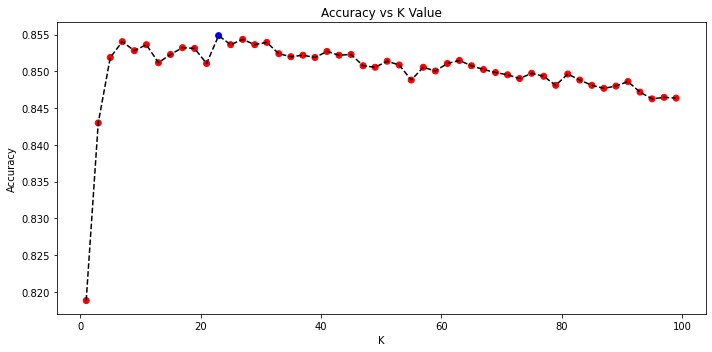

Maximum accuracy: 0.8548469648889344 at K = 23


In [40]:
# Plot of the accuracies for a visual representation

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

colors = ["blue" if i == size_range[accuracies.index(max(accuracies))] else "red" for i in size_range]

plt.scatter(size_range, accuracies, color=colors)
plt.plot(size_range, accuracies, color="black", linestyle="dashed")
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

fig.tight_layout()
plt.show()

print("Maximum accuracy:", max(accuracies), "at K =", size_range[accuracies.index(max(accuracies))])

In [41]:
# Create predictions with the correct K

K_val = size_range[accuracies.index(max(accuracies))]

new_cols = data.columns.tolist()

neighbors = KNeighborsClassifier(n_neighbors=K_val).fit(X_train, y_train)
predictions = neighbors.predict(X_test)

In [42]:
# Create a new dataframe with the predicted values in a new column

predictions_X = pd.DataFrame(X_test, columns=new_cols[:-1])
predictions_Y = pd.DataFrame(y_test, columns=["income"])
predictions_pred = pd.DataFrame(predictions, columns=["predicted-income"])

final_data = pd.concat([predictions_X, predictions_Y, predictions_pred], axis=1)

final_data["income"] = le.inverse_transform(final_data["income"])
final_data["predicted-income"] = le.inverse_transform(final_data["predicted-income"])

final_data

,age,educational-num,marital-status,relationship,gender,capital-gain,capital-loss,hours-per-week,income,predicted-income
0,43,9,5,1,1,0,0,40,<=50K,<=50K
1,47,9,2,5,0,0,0,40,>50K,<=50K
2,37,9,3,4,0,0,0,20,<=50K,<=50K
3,36,9,2,5,0,0,0,40,>50K,>50K
4,35,10,4,1,1,0,0,60,<=50K,<=50K
...,...,...,...,...,...,...,...,...,...,...
9764,21,10,4,3,1,0,0,20,<=50K,<=50K
9765,25,13,4,3,1,0,0,35,<=50K,<=50K
9766,29,9,5,1,1,0,0,35,<=50K,<=50K
9767,50,14,2,0,1,7298,0,40,>50K,>50K
